# Data Preprocessing

For the Data Preprocessing, I delved into the dataset's structure, features, and target variable. This involved scrutinizing data types and deriving statistical summaries. Through visualizations like histograms and scatter plots in the Data Transformations notebook, I gained insights into the distributions and relationships between variables, paving the way for informed decisions.

After that, I carefully selected relevant features based on my domain knowledge and analysis. I leveraged techniques like feature extraction and transformation. I diligently cleaned the data, tackling missing values with strategic imputation or removal strategies and addressing any outliers or anomalies that dared to disrupt the harmony of my dataset. With my dataset now looking pristine and ready for what I planned next, I turned my attention to transformation and scaling. I scaled my numerical features to a uniform range, then I split the dataset into training and testing sets, I laid the groundwork for model training and evaluation, carefully selecting the most suitable machine learning algorithm and assessing its performance using a variety of metrics.

I continued with hyperparameter tuning, where I tuned model parameters using techniques like grid search or randomized search to squeeze out every ounce of performance. With the model trained and optimized, I unraveling the feature importance and decision boundaries to glean insights into how the model makes predictions.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('../data/cleaned_data.csv')

# Dropping the null values
df.dropna(inplace=True)

In [6]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
non_numeric_columns

Index(['artist_name', 'track_name', 'genre', 'lyrics', 'topic'], dtype='object')

c:\Users\stacy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\stacy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\stacy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\stacy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

([<matplotlib.axis.XTick at 0x2bb612ed8d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

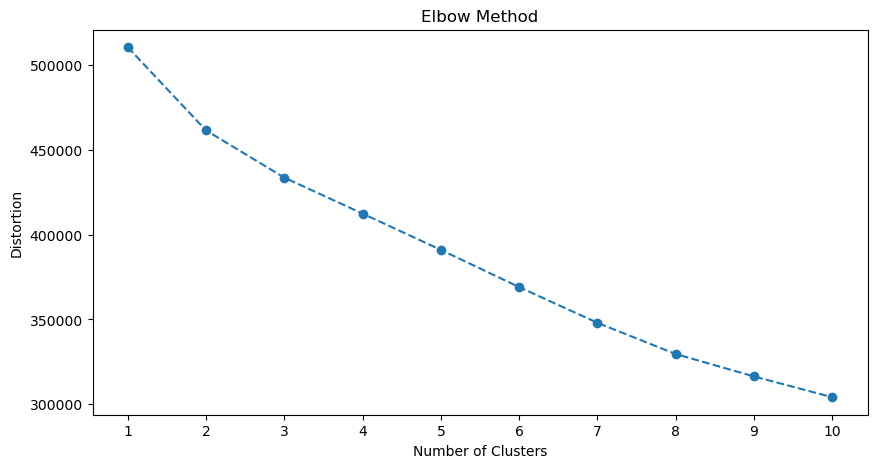

In [7]:
numerical_features = ['release_date', 'len', 'dating', 'violence', 'world/life', 'night/time', 
                      'shake the audience', 'family/gospel', 'romantic', 'communication', 
                      'obscene', 'music', 'movement/places', 'light/visual perceptions', 
                      'family/spiritual', 'sadness', 'feelings', 'age']
df_numeric = df[numerical_features]

# Scaling the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Calculating distortion for a range of clusters
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)

# One of the two references I am using for a range of clusters
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), distortions, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.xticks(np.arange(1, 11, 1))

c:\Users\stacy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\stacy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\stacy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\stacy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

([<matplotlib.axis.XTick at 0x2bb581039d0>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

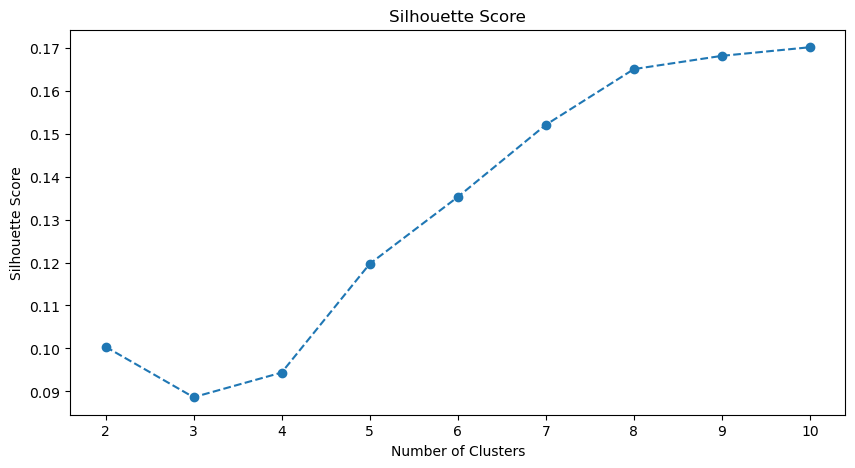

In [8]:
# Calculating silhouette scores for a range of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting to my hearts content
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, 11, 1))

In [9]:
# Scaling the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Training my KMeans model
kmeans = KMeans(n_clusters=8)
kmeans.fit(scaled_data)

# Getting the cluster labels
cluster_labels = kmeans.labels_
df['cluster'] = cluster_labels

output_file_path = '../data/raw_data_with_clusters.csv'
df.to_csv(output_file_path, index=False)

c:\Users\stacy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
# Dropping the columns that are not features
feature_columns = df.drop(columns=['artist_name', 'track_name', 'genre', 'lyrics', 'topic'])
target_variable = df['topic']

X_train, X_test, y_train, y_test = train_test_split(feature_columns, target_variable, test_size=0.2, random_state=42)

# Verifying the testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (22689, 19)
y_train shape: (22689,)
X_test shape: (5673, 19)
y_test shape: (5673,)


In [25]:
# Iterating over parameter value combinations
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Score: 0.9938736424363684


In [38]:
# Getting the best estimator from the grid search
best_model = grid_search.best_estimator_

# Prediction on the test set
y_pred = best_model.predict(X_test)

In [39]:
# Calculating the F1 score
f1 = f1_score(y_test, y_pred, average='macro')  # Choose an appropriate average setting
print(f"Best Model F1 Score: {f1}")

Best Model F1 Score: 0.991900567993673


In [30]:
model = LinearRegression()

In [45]:
label_encoder = LabelEncoder()

# Encoding the string labels in y_train
y_train_encoded = label_encoder.fit_transform(y_train)
# Fitting the model with the encoded target variable
model.fit(X_train, y_train_encoded)

LinearRegression()

In [46]:
y_pred = model.predict(X_test)

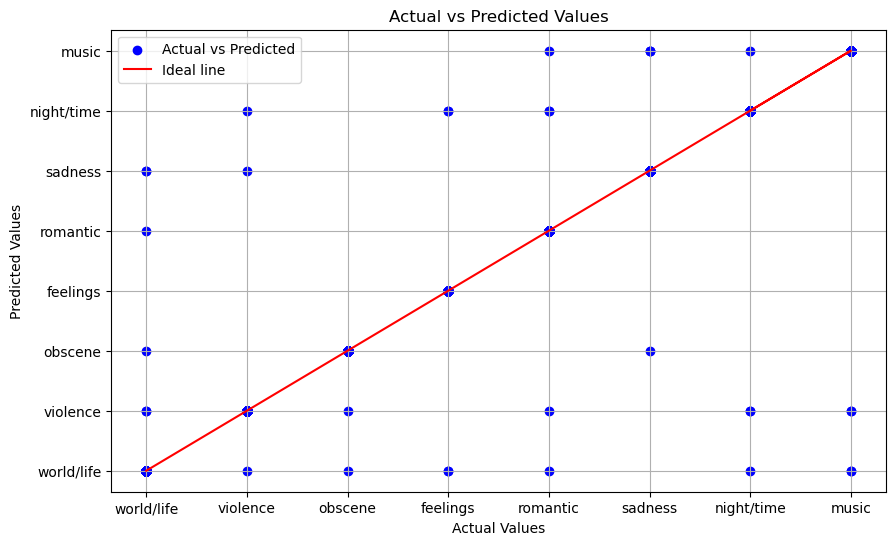

In [60]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', label='Ideal line')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
# Predicting on the test set using the best model

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print('Accuracy', accuracy_score(y_test, y_pred))
print('Best parameters:', grid_search.best_params_)

Accuracy 0.9943592455490922
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [50]:
# Showing off the feature importances
feature_columns = df.drop(columns=['artist_name', 'track_name', 'genre', 'lyrics', 'topic'])
X = feature_columns

column_names = X.columns
column_names

Index(['release_date', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'sadness', 'feelings', 'age'],
      dtype='object')

Text(0.5, 0, 'Relative Importance')

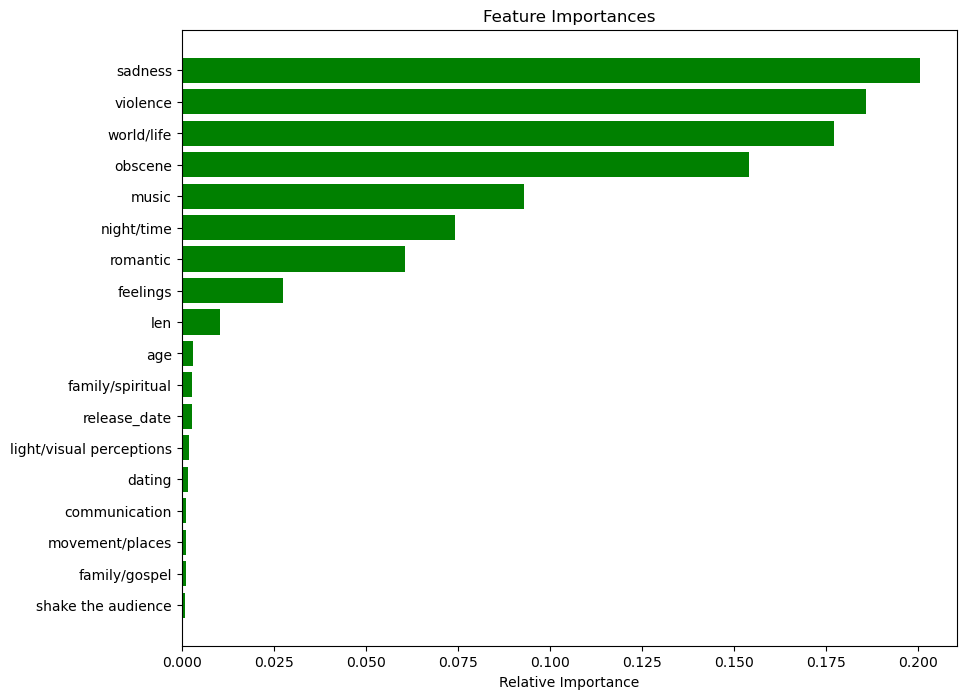

In [51]:
features = X.columns
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')